<a href="https://colab.research.google.com/github/LondheShubham153/deep_learning/blob/main/Social_Network_Ads_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from google.colab import drive
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split


In [ ]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
features = data.iloc[:, [2, 3]].values
label = data.iloc[:, [4]].values

In [ ]:
features = features / 255

In [ ]:
trainX, testX, trainY, testY = train_test_split(features, label, test_size=0.2, random_state=10)

In [ ]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
acc_thresh = 0.65
ACCURACY_THRESHOLD = 0.95
class custom_callback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        print(logs)
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):   
          print("Stopping training at" %(acc_thresh*100))   
        self.model.stop_training = True

callbacks = custom_callback()

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(6, activation='relu', input_shape= (2, )))
model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

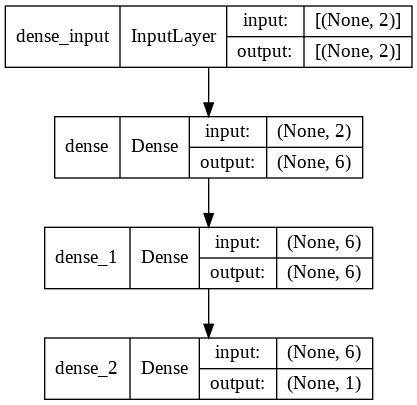

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history  = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=12, callbacks=[callbacks])

Epoch 1/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6745 - accuracy: 0.6406 - val_loss: 0.6714 - val_accuracy: 0.6500
